# Real-Time Anomaly Detection - Complete Analysis

In [1]:
import sys
sys.path.append('../src')
from detectors.pipeline import *
from visualizations import AnomalyVisualizer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Generate Synthetic Data

Generating synthetic time series...
Created 1000 points with 50 true anomalies


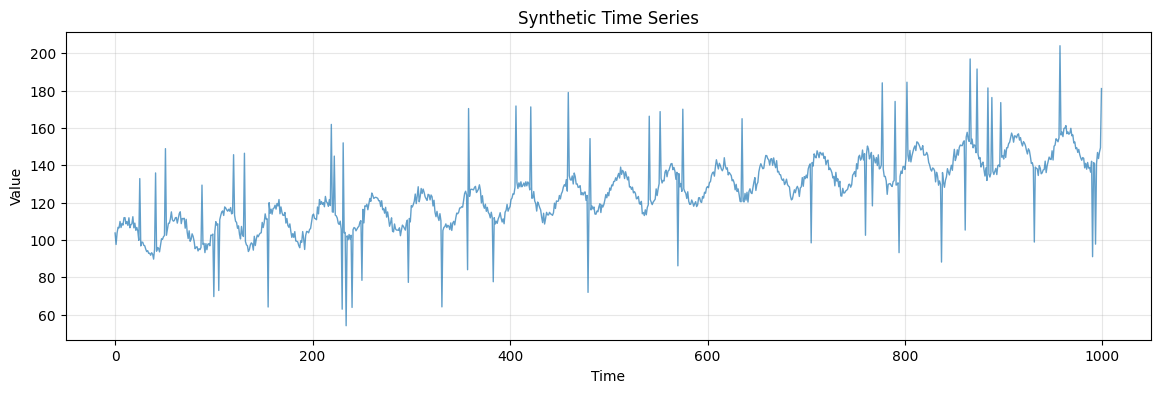

In [2]:
print('Generating synthetic time series...')
data, true_labels = generate_synthetic_data(n_points=1000, anomaly_rate=0.05)

print(f'Created {len(data)} points with {np.sum(true_labels)} true anomalies')

plt.figure(figsize=(14, 4))
plt.plot(data, linewidth=1, alpha=0.7)
plt.title('Synthetic Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(alpha=0.3)
plt.show()

## Train Detector

In [3]:
train_size = 500
train_data = data[:train_size]
test_data = data[train_size:]
test_labels = true_labels[train_size:]

pipeline = StreamingPipeline(detector_type='ensemble')
pipeline.train(train_data)

print(f'Training: {len(train_data)} points')
print(f'Testing: {len(test_data)} points')


🔧 Training ensemble detector...
  Training samples: 500
  Training 4 detectors...
  ✅ All detectors trained
  ✅ Training complete
Training: 500 points
Testing: 500 points


## Detect Anomalies

In [4]:
results = pipeline.process_stream(test_data)

print(f'\nDetected {len(pipeline.anomalies)} anomalies')
print(f'True anomalies in test: {np.sum(test_labels)}')


📊 Processing stream of 500 points...
  ✅ Detected 23 anomalies (4.6%)

Detected 23 anomalies
True anomalies in test: 24


## Visualize Results

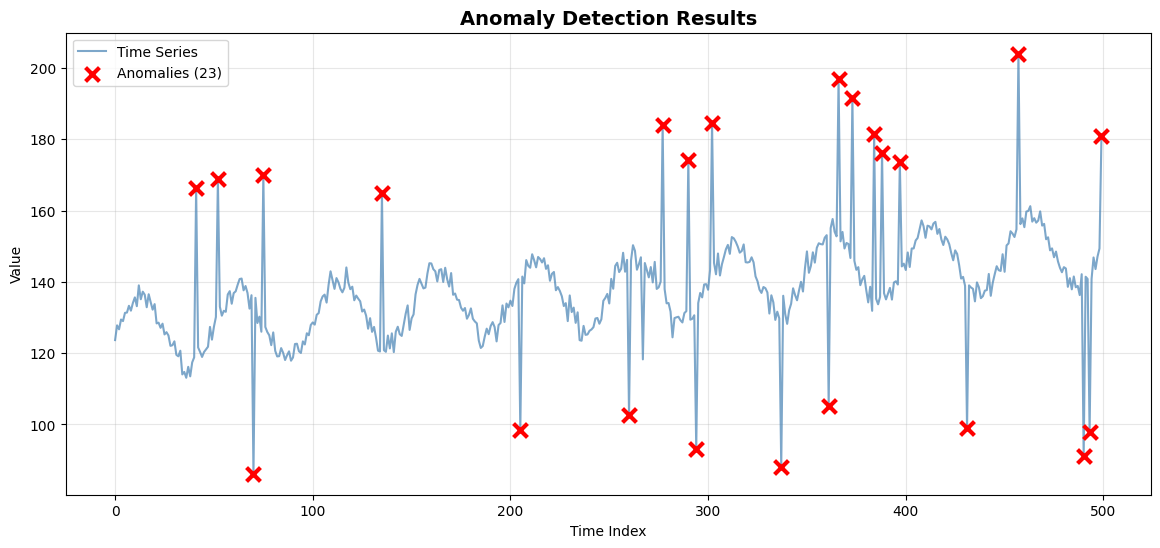

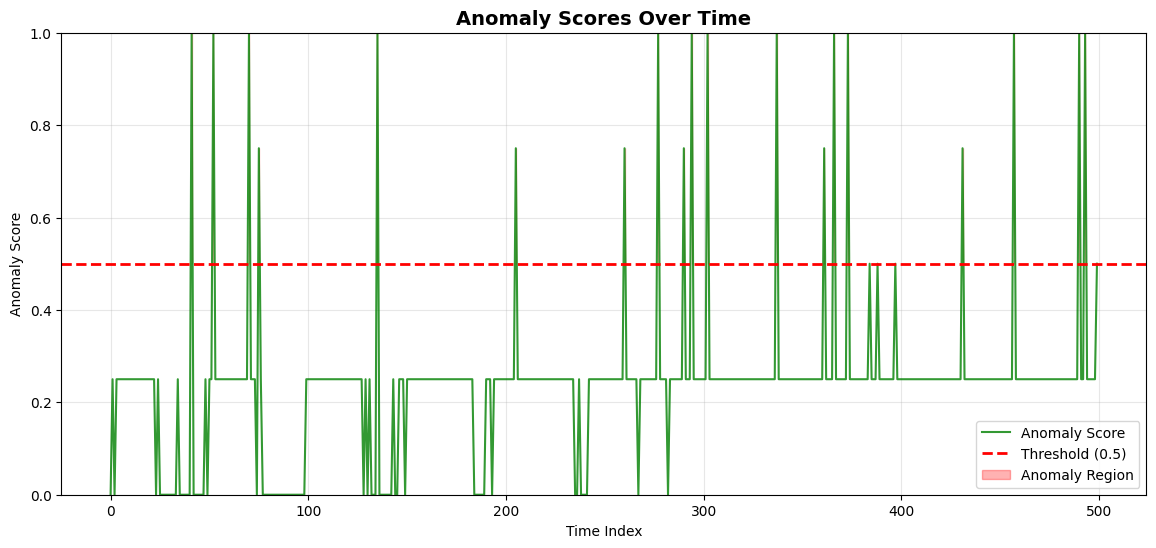

In [5]:
viz = AnomalyVisualizer('../assets')

# Time series with anomalies
viz.plot_time_series_with_anomalies(test_data, pipeline.anomalies, save=False)

# Anomaly scores
scores = [r['score'] for r in results['results']]
viz.plot_anomaly_scores(np.array(scores), save=False)

## Evaluate Performance

In [6]:
predictions = np.array([r['is_anomaly'] for r in results['results']])
metrics = evaluate_detector(predictions, test_labels)

print('Performance Metrics:')
for metric, value in metrics.items():
    if isinstance(value, float):
        print(f'  {metric}: {value:.3f}')
    else:
        print(f'  {metric}: {value}')

Performance Metrics:
  precision: 1.000
  recall: 0.958
  f1_score: 0.979
  true_positives: 23
  false_positives: 0
  false_negatives: 1


## Complete Dashboard

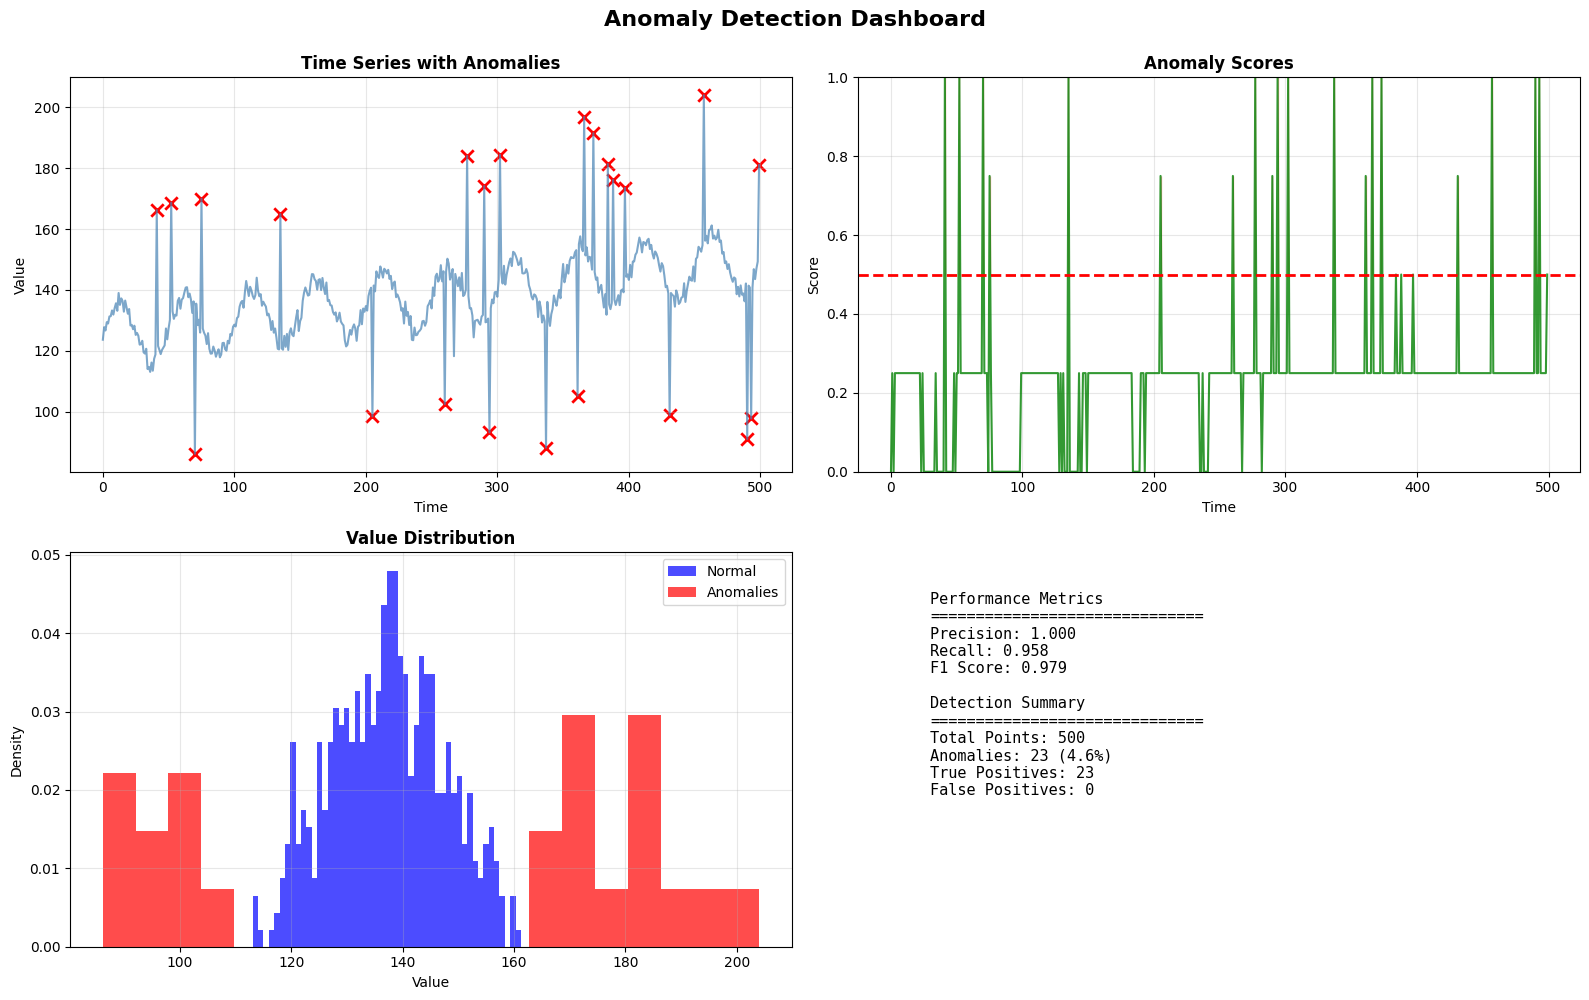

In [7]:
viz.create_dashboard(test_data, pipeline.anomalies, np.array(scores), metrics, save=False)

## Conclusion

This demonstrates:
- Multiple detection algorithms
- Ensemble voting
- Real-time processing
- Performance evaluation
- Comprehensive visualizations